In [1]:
from math import sqrt, floor

def initialize(ds, k):
    '''
    Create random cluster centroids
    
    Parameters:
    -----------
    ds: ndarray
        Dataset to cluster instances from
    k: int
        The number of clusters
    
    Returns:
    --------
    ndarray
        k centroids as numpy ndarray
    '''
    # Number of attributes in dataset
    n = np.shape(ds)[1]    
    # The centroids
    centroids = np.mat(np.zeros((k,n)))
    # Create random centroids (get min, max attribute values, randomize in that range)
    for j in range(n):
        min_j = min(ds[:,j])
        range_j = float(max(ds[:,j]) - min_j)
        centroids[:,j] = min_j + range_j * np.random.rand(k, 1)
    # Return centroids as numpy array
    return centroids

## Measuring Distances with Standard Euclidean Dustance 

In [2]:
import math
def euclidean_dist(A, B):   
    '''
    Calculate Euclidean distance between 2 n-dimension points
    
    Parameters:
    -----------
    A: ndarray
        vector of point coordinates to compare
    B: ndarray
        vector of point coordinates to compare
    Returns:
    --------
    float
        calculated Euclidean distance of the 2 vectors
    '''
    dist = (A - B)
    dlist = dist.tolist()[0]   
    squared_distance = 0
    #Assuming correct input to the function where the lengths of two features are the same
    for i in range(len(dlist)):
            squared_distance += (dlist[i])**2
    ed = squared_distance**0.5
    return ed;    

## Clustering Distance

In [3]:
 '''
    The k-means clustering algorithm   
    Parameters:
    -----------
    ds: ndarray
        Dataset to cluster instances from
    k: int
        The number of clusters
    Returns:
    --------
    ndarray
        Resulting centroids after clustering
    ndarray
        Cluster assignments after clustering
    int
        Number of iterations required by clustering algorithm
    ndarray
        Original centroids
    '''
import numpy as np
def cluster(ds, k):
    # Number of rows in dataset
    m = np.shape(ds)[0]
    # Hold the instance cluster assignments
    cluster_assignments = np.mat(np.zeros((m, 2)))
    # Initialize centroids
    cents = initialize(ds, k)   
    # Preserve original centroids
    cents_orig = cents.copy()   
    changed = True
    num_iter = 0
    # Loop until no changes to cluster assignments
    while changed:
        changed = False
        # For every instance (row in dataset)
        for i in range(m):
            # Track minimum distance, and vector index of associated cluster
            min_dist = np.inf
            min_index = -1
            # Calculate distances
            for j in range(k):
                dist_ji = euclidean_dist(cents[j,:], ds[i,:])
                if dist_ji < min_dist:
                    min_dist = dist_ji
                    min_index = j
            # Check if cluster assignment of instance has changed
            if cluster_assignments[i, 0] != min_index: 
                changed = True
            # Assign instance to appropriate cluster
            cluster_assignments[i, :] = min_index, min_dist**2
        # Update centroid location
        for cent in range(k):
            points = ds[np.nonzero(cluster_assignments[:,0].A==cent)[0]]
            cents[cent,:] = np.mean(points, axis=0)
        # Count iterations
        num_iter += 1
    # Return important stuff when done
    return cents, cluster_assignments, num_iter, cents_orig

## Testing the Implemented k-Means Clustering Algorithm with TwoDimHard Dataset

In [4]:
import pandas as pd

#Load dataset
ds = pd.read_csv('/Users/yawenhan/Documents/Python/TwoDimHard.csv')

In [5]:
ds_cluster=ds[['X.1','X.2']]
ds_assignments=ds[['cluster']].as_matrix()

In [6]:
print(ds_cluster.describe())

              X.1         X.2
count  400.000000  400.000000
mean     0.543370    0.551230
std      0.185391    0.197673
min      0.204043    0.020444
25%      0.369848    0.392325
50%      0.548462    0.561653
75%      0.684134    0.731155
max      1.037393    0.883700


In [7]:
# Convert dataset to matrix representation
ds_matrix = ds_cluster.as_matrix()

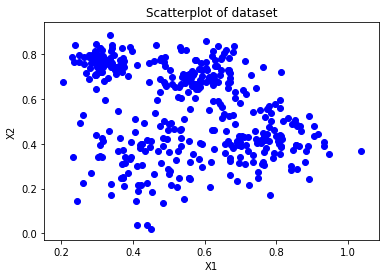

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for i in range(4):
    points = np.array([ds_matrix[j] for j in range(len(ds_matrix)) if ds_assignments[j] == i+1])
    ax.scatter(points[:, 0], points[:, 1], c='b')
plt.ylabel("X2")
plt.xlabel("X1")
plt.title('Scatterplot of dataset')
display(fig)

In [9]:
original_sse = []
origial_centroids = []
original_count = []
for i in range(4):
    # Find all the records in cluster i
    cluster_i = np.array([ds_matrix[j] for j in range(len(ds_matrix)) if ds_assignments[j] == i+1])
    # Centroid of cluster i
    mean_i = np.mean(cluster_i,axis=0)
    count_i = len(cluster_i)
    origial_centroids.append(mean_i)
    original_count.append(count_i)
    # Find SSE 
    sse_i = 0
    for m in range(len(ds_matrix)):
        if ds_assignments[m] == i+1:
            diff = mean_i-ds_matrix[m]
            sse_i += diff[0]**2+diff[1]**2 
    original_sse.append(sse_i)
    print 'For cluster {}: size is {}, SSE is {}'.format(i+1,count_i,sse_i)
print 'Overall SSE is {}'.format(np.sum(original_sse))    
# Find overall centroid
overall_centroids = ds_mean = np.mean(ds_cluster).tolist()
original_ssb = 0
for i in range(4):
    cent = origial_centroids[i]
    diff = cent-overall_centroids
    original_ssb += original_count[i]*(diff[0]**2+diff[1]**2)
print 'SSB is {}'.format(original_ssb)    
    

For cluster 1: size is 89, SSE is 0.312847718218
For cluster 2: size is 100, SSE is 0.90253361492
For cluster 3: size is 97, SSE is 2.43011871857
For cluster 4: size is 114, SSE is 1.91071546593
Overall SSE is 5.55621551764
SSB is 23.7481256186


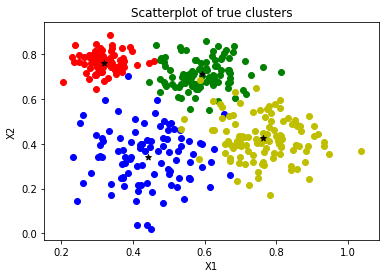

In [10]:

colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(4):
    points = np.array([ds_matrix[j] for j in range(len(ds_matrix)) if ds_assignments[j] == i+1])
    ax.scatter(points[:, 0], points[:, 1], c=colors[i])
ax.scatter(np.array(origial_centroids)[:,0], np.array(origial_centroids)[:,1], marker='*', c='#050505')
plt.ylabel("X2")
plt.xlabel("X1")
plt.title('Scatterplot of true clusters')
display(fig)

## K=4

In [11]:
# Total cluster number
k=4
# Perform k-means clustering
[centroids, cluster_assignments, iters, orig_centroids]=cluster(ds_matrix, k)
# Output results
print 'Number of iterations:', iters
print '\nFinal centroids:\n', centroids
print '\nCluster membership and error of first 10 instances:\n', cluster_assignments[:10]
print '\nOriginal centroids:\n', orig_centroids

Number of iterations: 12

Final centroids:
[[ 0.59580368  0.69767513]
 [ 0.77289734  0.41198897]
 [ 0.44101165  0.32613108]
 [ 0.32221294  0.75482519]]

Cluster membership and error of first 10 instances:
[[  3.00000000e+00   3.58531975e-03]
 [  3.00000000e+00   2.42319495e-03]
 [  3.00000000e+00   8.88583991e-03]
 [  3.00000000e+00   5.15103950e-04]
 [  3.00000000e+00   9.43396221e-04]
 [  3.00000000e+00   1.48302709e-02]
 [  3.00000000e+00   1.62469240e-03]
 [  3.00000000e+00   1.30947717e-03]
 [  3.00000000e+00   7.65308909e-03]
 [  3.00000000e+00   1.52251213e-03]]

Original centroids:
[[ 0.77961103  0.55519721]
 [ 0.6746227   0.28652773]
 [ 0.27445757  0.08814409]
 [ 0.78371687  0.8052924 ]]


In [12]:
# Output the row ID and the cluster that each record belongs to
output = ds['ID']
output.columns = ['ID','OutputCluster']
output=pd.DataFrame(output)
cluster_assignments_list = cluster_assignments.tolist()
a =[]
for i in range(len(cluster_assignments_list)):
    a.append(cluster_assignments_list[i][0])   
output['OutputCluster'] = a
print(output.head(10))

   ID  OutputCluster
0   1            3.0
1   2            3.0
2   3            3.0
3   4            3.0
4   5            3.0
5   6            3.0
6   7            3.0
7   8            3.0
8   9            3.0
9  10            3.0


In [13]:
def sse(cluster_assignment_list, num):

    '''
    Compute SSE for the given cluster number
    
    Parameters:
    -----------
    cluster_assignment: list about cluster assignment after clustering
        Dataset to cluster instances from
    cluster_num: int
        The number of clusters
    Returns:
    --------
    count
        Size of the cluster
    SSE
        Sum of squares of the cluster       
    '''
    # Compute SSE and size for each cluster
    count = 0
    SSE = 0
    for i in range(len(cluster_assignments_list)):
        
        cluster_num = cluster_assignments_list[i][0]
        distance_square = cluster_assignments_list[i][1]
        # Add the SSE and count if the cluster number is the given one
        if cluster_num == num:
            count = count + 1
            SSE += distance_square
    return count, SSE
      

In [14]:
def cluster_output(cluster_assignment_list, ds_cluster):
    cluster_size = []
    cluster_sse = []
    overall_sse = 0
    # Find SSE for each cluster
    for i in range(k):
        [count, SSE] = sse(cluster_assignments_list,i)
        cluster_size.append(count)
        cluster_sse.append(SSE)
        overall_sse += SSE
        print 'For cluster {}: size is {}, SSE is {}'.format(i,count,SSE)
    print 'Overall SSE is {}'.format(overall_sse)
    # Find the overall centroid
    ds_mean = np.mean(ds_cluster).tolist()
    # Find SSB for each cluster
    ssb = 0
    for i in range(k):
        cent = centroids[i]
        ssb += cluster_size[i]*(euclidean_dist(cent,ds_mean)**2)
    print 'SSB is {}'.format(ssb)


In [15]:
cluster_output(cluster_assignments_list, ds_cluster)

For cluster 0: size is 108, SSE is 1.07648508781
For cluster 1: size is 107, SSE is 1.47053419455
For cluster 2: size is 90, SSE is 1.8446030118
For cluster 3: size is 95, SSE is 0.500480575274
Overall SSE is 4.89210286944
SSB is 24.4122382668


In [16]:
from sklearn.metrics import confusion_matrix
# Keep the cluster number for actual consistent with cluster number for predicted
new_a = [x+1 for x in a]
# Find the confusion matrix for clusters with k=4
cm = confusion_matrix(ds_assignments.tolist(), new_a)
cm=  pd.DataFrame(cm)
cm.columns = ['Pred cluster1','Pred cluster2','Pred cluster3','Pred cluster4']
cm.index = ['Actual cluster1','Actual cluster2','Actual cluster3','Actual cluster4']
# Total of the columns
cm['Total'] = cm.sum(axis=1)
# Total of rows
total = cm.apply(np.sum)
cm.loc['Total']= cm.sum()
print(cm)

                 Pred cluster1  Pred cluster2  Pred cluster3  Pred cluster4  \
Actual cluster1              0              0              0             89   
Actual cluster2             98              0              0              2   
Actual cluster3              2              3             88              4   
Actual cluster4              8            104              2              0   
Total                      108            107             90             95   

                 Total  
Actual cluster1     89  
Actual cluster2    100  
Actual cluster3     97  
Actual cluster4    114  
Total              400  


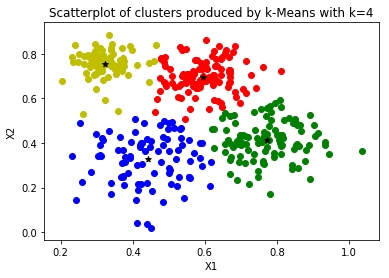

In [17]:
# Plot Scatter diagram
import matplotlib.pyplot as plt
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
    points = np.array([ds_matrix[j] for j in range(len(ds_matrix)) if cluster_assignments_list[j][0] == i])
    ax.scatter(points[:, 0], points[:, 1], c=colors[i])
ax.scatter(centroids[:, 0].tolist(), centroids[:, 1].tolist(), marker='*', c='#050505')
plt.ylabel("X2")
plt.xlabel("X1")
plt.title('Scatterplot of clusters produced by k-Means with k=4')
display(fig)

## k=3

In [18]:
# Total cluster number
k=3
# Perform k-means clustering
[centroids, cluster_assignments, iters, orig_centroids]=cluster(ds_matrix, k)
# Output results
print 'Number of iterations:', iters
print '\nFinal centroids:\n', centroids
print '\nCluster membership and error of first 10 instances:\n', cluster_assignments[:10]
print '\nOriginal centroids:\n', orig_centroids

Number of iterations: 6

Final centroids:
[[ 0.61153755  0.35336475]
 [ 0.33140588  0.74424529]
 [ 0.62942836  0.67089446]]

Cluster membership and error of first 10 instances:
[[  1.00000000e+00   5.44201183e-03]
 [  1.00000000e+00   3.08193976e-03]
 [  1.00000000e+00   1.14797796e-02]
 [  1.00000000e+00   9.20094791e-04]
 [  1.00000000e+00   3.07573931e-04]
 [  1.00000000e+00   1.28998659e-02]
 [  1.00000000e+00   7.72375415e-04]
 [  1.00000000e+00   1.14830552e-03]
 [  1.00000000e+00   9.64753765e-03]
 [  1.00000000e+00   1.30942634e-03]]

Original centroids:
[[ 0.72765219  0.36260193]
 [ 0.44311287  0.64999376]
 [ 0.66984906  0.55885841]]


In [19]:
# Output the row ID and the cluster that each record belongs to
output = ds['ID']
output.columns = ['ID','OutputCluster']
output=pd.DataFrame(output)
cluster_assignments_list = cluster_assignments.tolist()
a=[]
for i in range(len(cluster_assignments_list)):
    a.append(cluster_assignments_list[i][0])
    
output['OutputCluster'] = a
print(output.head(10))

   ID  OutputCluster
0   1            1.0
1   2            1.0
2   3            1.0
3   4            1.0
4   5            1.0
5   6            1.0
6   7            1.0
7   8            1.0
8   9            1.0
9  10            1.0


In [20]:
cluster_output(cluster_assignments_list, ds_cluster)

For cluster 0: size is 175, SSE is 7.56330722808
For cluster 1: size is 105, SSE is 0.973849641249
For cluster 2: size is 120, SSE is 1.86626432878
Overall SSE is 10.4034211981
SSB is 18.9009199382


In [21]:
# Keep the cluster number for actual consistent with cluster number for predicted
new_a = [x+1 for x in a]
# Find the confusion matrix for clusters with k=3
cm = confusion_matrix(ds_assignments.tolist(), new_a)
cm=  pd.DataFrame(cm)
cm.columns = ['Pred cluster1','Pred cluster2','Pred cluster3','Pred cluster4']
cm.index = ['Actual cluster1','Actual cluster2','Actual cluster3','Actual cluster4']
# Total of the columns
cm['Total'] = cm.sum(axis=1)
# Total of rows
total = cm.apply(np.sum)
cm.loc['Total']= cm.sum()
print(cm[['Pred cluster1','Pred cluster2','Pred cluster3','Total']])

                 Pred cluster1  Pred cluster2  Pred cluster3  Total
Actual cluster1              0             89              0     89
Actual cluster2              0              8             92    100
Actual cluster3             86              8              3     97
Actual cluster4             89              0             25    114
Total                      175            105            120    400


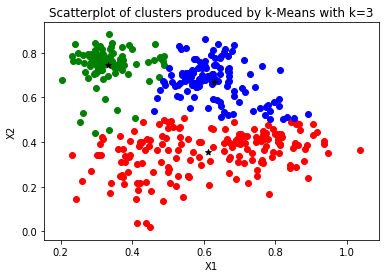

In [22]:
# Plot Scatter Diagram
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
    points = np.array([ds_matrix[j] for j in range(len(ds_matrix)) if cluster_assignments_list[j][0] == i])
    ax.scatter(points[:, 0], points[:, 1], c=colors[i])
ax.scatter(centroids[:, 0].tolist(), centroids[:, 1].tolist(), marker='*', c='#050505')
plt.ylabel("X2")
plt.xlabel("X1")
plt.title('Scatterplot of clusters produced by k-Means with k=3')
display(fig)